In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data=pd.read_csv('Pizza.csv')

In [74]:
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [75]:
data.rename({'price_rupiah':'price'},axis=1,inplace=True)

In [76]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price            129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [78]:
data.describe()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,129,129,129,129,129,129,129,129,129
unique,5,43,12,12,20,6,2,2,2
top,C,"Rp72,000",12 inch,chicken,classic,medium,yes,yes,yes
freq,30,11,49,29,30,41,76,86,72


In [79]:
data['diameter']=data['diameter'].str.replace('inch','')

In [80]:
data['diameter'].astype(float)

0      22.0
1      20.0
2      16.0
3      14.0
4      18.0
       ... 
124     8.5
125    12.0
126    14.0
127     8.5
128    12.0
Name: diameter, Length: 129, dtype: float64

In [81]:
data['price']=data['price'].str.replace('Rp','')

In [82]:
data['price']=data['price'].str.replace(',','').astype(int)

In [83]:
data['price']

0      235000
1      198000
2      120000
3      155000
4      248000
        ...  
124     39000
125     72000
126     99000
127     44000
128     78000
Name: price, Length: 129, dtype: int64

In [84]:
data['price'] = data['price'].round(1)

In [85]:
def convert(value):
   return value*0.0055

In [86]:
data['price']=data['price'].apply(convert)

In [87]:
data['price']

0      1292.5
1      1089.0
2       660.0
3       852.5
4      1364.0
        ...  
124     214.5
125     396.0
126     544.5
127     242.0
128     429.0
Name: price, Length: 129, dtype: float64

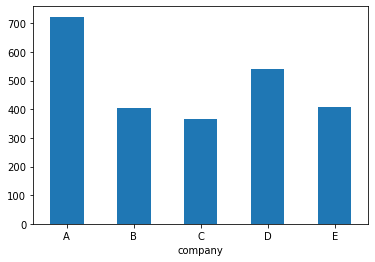

In [88]:
data.groupby('company')['price'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diameter', ylabel='count'>

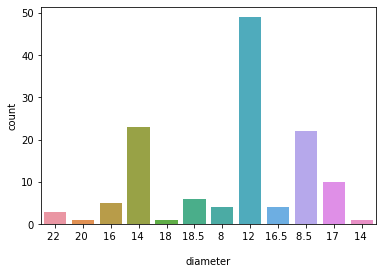

In [89]:
sns.countplot(data['diameter'])

<AxesSubplot:xlabel='price', ylabel='topping'>

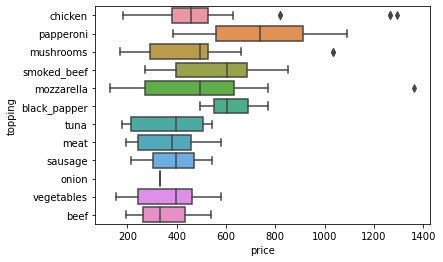

In [90]:
sns.boxplot(y='topping',x='price',data=data)

<AxesSubplot:xlabel='size', ylabel='price'>

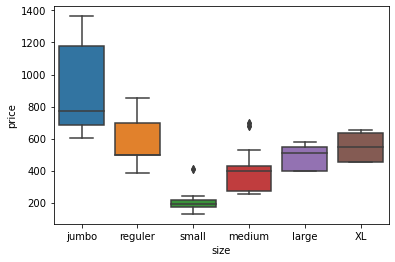

In [91]:
sns.boxplot(y='price',x='size',data=data)

In [92]:
data[data['price']==data['price'].max()]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,A,1364.0,18,mozzarella,double_signature,jumbo,yes,no,yes


In [93]:
data[data['size']=='jumbo']['diameter'].head()

0      22 
1      20 
4      18 
5    18.5 
6      16 
Name: diameter, dtype: object

In [94]:
data[data['size']=='XL']['diameter'].head()

29    17 
35    17 
41    17 
47    17 
93    17 
Name: diameter, dtype: object

In [95]:
data['diameter'].astype(float)

0      22.0
1      20.0
2      16.0
3      14.0
4      18.0
       ... 
124     8.5
125    12.0
126    14.0
127     8.5
128    12.0
Name: diameter, Length: 129, dtype: float64

In [102]:
cat_cols=data.select_dtypes(include=['object']).columns

In [103]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1292.5,22,chicken,double_signature,jumbo,yes,yes,no
1,A,1089.0,20,papperoni,double_signature,jumbo,yes,yes,no
2,A,660.0,16,mushrooms,double_signature,reguler,yes,yes,yes
3,A,852.5,14,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1364.0,18,mozzarella,double_signature,jumbo,yes,no,yes


In [104]:
from sklearn.preprocessing import LabelEncoder

In [107]:
en=LabelEncoder()
for i in cat_cols:
    data[i]=en.fit_transform(data[i])

In [108]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1292.5,9,2,8,1,1,1,0
1,0,1089.0,8,7,8,1,1,1,0
2,0,660.0,3,5,8,4,1,1,1
3,0,852.5,1,9,8,4,1,0,1
4,0,1364.0,6,4,8,1,1,0,1


In [113]:
X=data.drop('price',axis=1)
y=data['price']

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=37)

In [116]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1292.5,9,2,8,1,1,1,0
1,0,1089.0,8,7,8,1,1,1,0
2,0,660.0,3,5,8,4,1,1,1
3,0,852.5,1,9,8,4,1,0,1
4,0,1364.0,6,4,8,1,1,0,1


In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [121]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [122]:
svm = SVR()
svm.fit(X_train,y_train)


SVR()

In [123]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [124]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [125]:
y_pred1=lr.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gbr.predict(X_test)

In [127]:
from sklearn import metrics
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [128]:
print(score1,score2,score3,score4)

0.45934709513859395 -0.0010275034172069208 0.8722305256106281 0.8025218444791676


In [130]:
final_data=pd.DataFrame({'Models':['LR','SVM','RF','GBR'],'R2SCORE':[score1,score2,score3,score4]})

<AxesSubplot:>

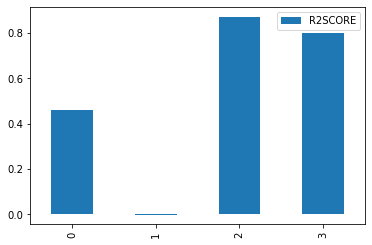

In [132]:
final_data.plot(kind='bar')

In [133]:
rf.feature_importances_

array([0.08511254, 0.14197647, 0.0448593 , 0.32623707, 0.33996333,
       0.03502004, 0.01931417, 0.00751708])

In [134]:
fea=pd.Series(rf.feature_importances_,index=X_train.columns)

<AxesSubplot:>

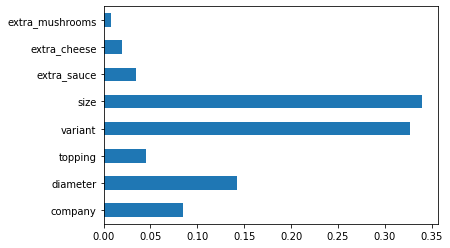

In [136]:
fea.plot(kind='barh')

In [137]:
gbr.feature_importances_

array([0.0914006 , 0.16173867, 0.05160327, 0.34590887, 0.33212105,
       0.00928911, 0.00750682, 0.00043161])

In [138]:
fea=pd.Series(gbr.feature_importances_,index=X_train.columns)

<AxesSubplot:>

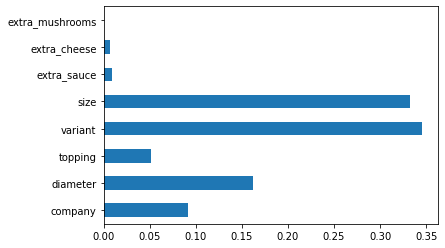

In [139]:
fea.plot(kind='barh')

In [140]:
X=data.drop('price',axis=1)
y=data['price']

In [143]:
rf=RandomForestRegressor()

In [144]:
rf.fit(X,y)

RandomForestRegressor()

In [145]:
import joblib


In [146]:
joblib.dump(rf,'Pizza_Price_Prediction')

['Pizza_Price_Prediction']

In [147]:
model=joblib.load('Pizza_Price_Prediction')

In [148]:
import pandas as pd
df=pd.DataFrame({
    'company':2,
    'diameter':18.0,
    'topping':2,
    'variant':7,
    'size':1,
    'extra_sauce':1,
    'extra_cheese':2,
    'extra_mushrooms':1,
  },index=[0])

In [149]:
df


,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,2,18.0,2,7,1,1,2,1


In [150]:
model.predict(df)

array([1121.12])